In [1]:
import cv2
import skimage.io
import numpy as np
from helpers import *
from classes import *
import matplotlib.pyplot as plt
    
img = skimage.io.imread('dock.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

with open('Pyramid_Arrays.pkl', 'rb') as f:
    pyr = pickle.load(f)

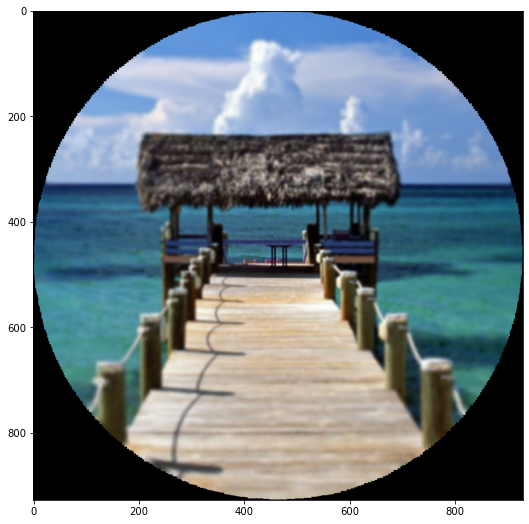

In [2]:
R = Retina('retina.pkl')
R.calibrate(img)
R.sample(img)
R.backProject()

plt.figure(figsize=(9,9))
plt.imshow(get_retinaBackProjected_RGB(R))
plt.show()
# plt.figure(figsize=(9,9))
# plt.imshow(get_retinaBackProjected_GRAY(R) ,cmap='gray')
# plt.show()

In [3]:
pyr_levels = []

for i in range(len(pyr)):
    index_array, coeff_array, size_array, input_dimension = pyr[i]
    pyr_levels.append(Pyramid_Level(coeff_array, index_array.astype('uint32'), size_array.astype('uint16'), input_dimension, 1))

In [4]:
img_vect = R.getResult()
dock_guassian = [img_vect]
for i in range(len(pyr_levels)):
    pyr_levels[i].calibrate(dock_guassian[-1])
    pyr_levels[i].sample(dock_guassian[-1].astype('uint8'))
    dock_guassian.append(pyr_levels[i].getResult())

In [5]:
reconstructions = []
for i in range(len(pyr_levels)):
    inverse_pyramid = [dock_guassian[i+1]]
    for level in range(i,-1,-1):
        pyr_levels[level].sampledVector = inverse_pyramid[-1]
        pyr_levels[level].backProject()
        inverse_pyramid.append(pyr_levels[level].backProjectedVector)
    reconstructions.append(inverse_pyramid[-1])

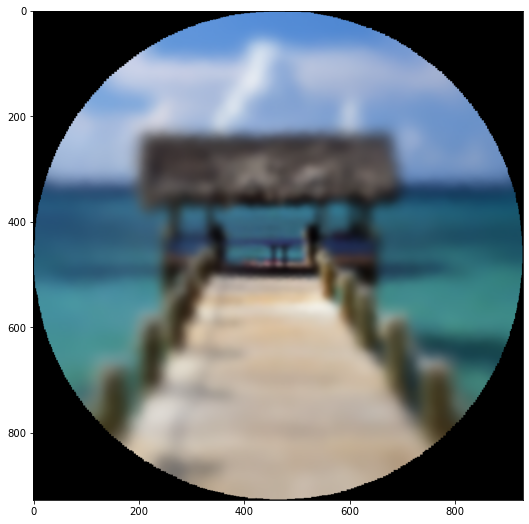

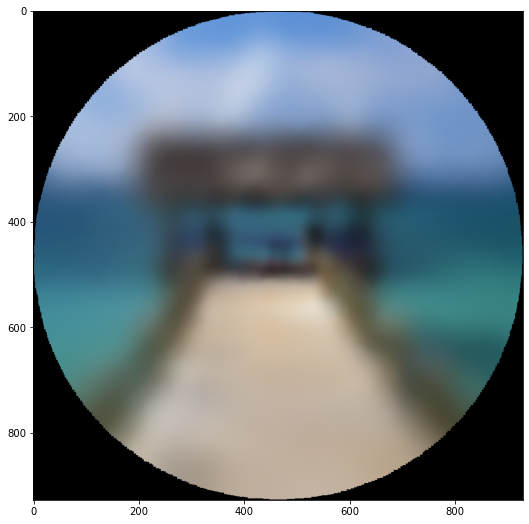

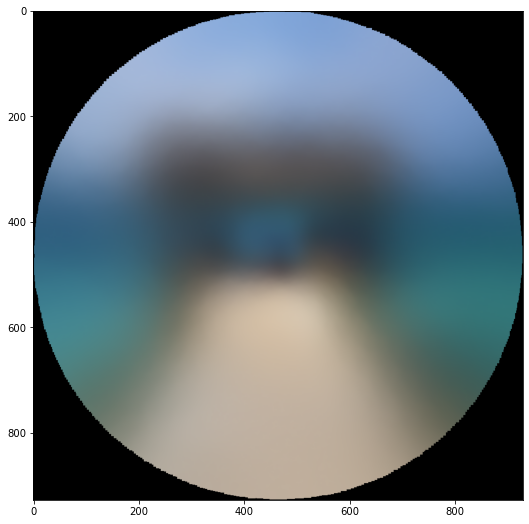

In [6]:
for i in range(len(reconstructions)):
    R.sampledVector = reconstructions[i]
    R.backProject()
#     plt.figure(figsize=(9,9))
#     plt.imshow(get_retinaBackProjected_GRAY(R) ,cmap='gray')
#     plt.show()
    plt.figure(figsize=(9,9))
    plt.imshow(get_retinaBackProjected_RGB(R))
    plt.show()